<a href="https://colab.research.google.com/github/mauricioyc/Probabilistic-Machine-Learning/blob/master/Multi_Armed_Bandit/multi_armed_bandit_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inline-style: 
![alt text](https://static.wingify.com/gcp/uploads/sites/3/2020/03/image-4-1024x476.png?tr=w-1024 "Logo Title Text 1")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_history(history):
  rewards = history["rewards"]
  cum_rewards = history["cum_rewards"]
  chosen_arms = history["arms"]

  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Cummulative Rewards")

  ax3 = fig.add_subplot(122)
  ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
  ax3.set_title("Chosen Actions")

In [ ]:
class Env(object):

  def __init__(self, reward_probas, rewards):
    if len(reward_probas) != len(rewards):
      raise Exception(f"size of reward probas : {len(reward_probas)} does not match size of rewards: {len(rewards)}")

    self.reward_probas = reward_probas
    self.rewards = rewards 
    self.k_arms = len(rewards)

  def choose_arm(self, arm):
    if arm < 0 or arm > self.k_arms:
      raise Exception(f"arm must be a value between 0 and {self.k_arms -1}")

    return self.rewards[arm] if np.random.random() < self.reward_probas[arm] else 0.0

In [ ]:
environment = Env(reward_probas=[0.01, 1.0, 0.75, 0.99, 0.65, 1.0], rewards=[95.0, 0.0, 25.5, 10.05, 5.45, 2.50])
print(f"Reward Probas\t\t: {environment.reward_probas}")
print(f"Rewards \t\t: {environment.rewards}")

Reward Probas		: [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
Rewards 		: [95.0, 0.0, 25.5, 10.05, 5.45, 2.5]


In [ ]:
[environment.choose_arm(0) for _ in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
class RandomAgent(object):

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  def act(self):
    arm_counts = np.zeros(self.env.k_arms)
    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms)
      reward = self.env.choose_arm(arm)

      arm_counts[arm] += 1
      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}

In [ ]:
random_agent = RandomAgent(env=environment, max_iterations=2000)
ra_history = random_agent.act()
print(f"TOTAL REWARD : {sum(ra_history['rewards'])}")

TOTAL REWARD : 11539.64999999998


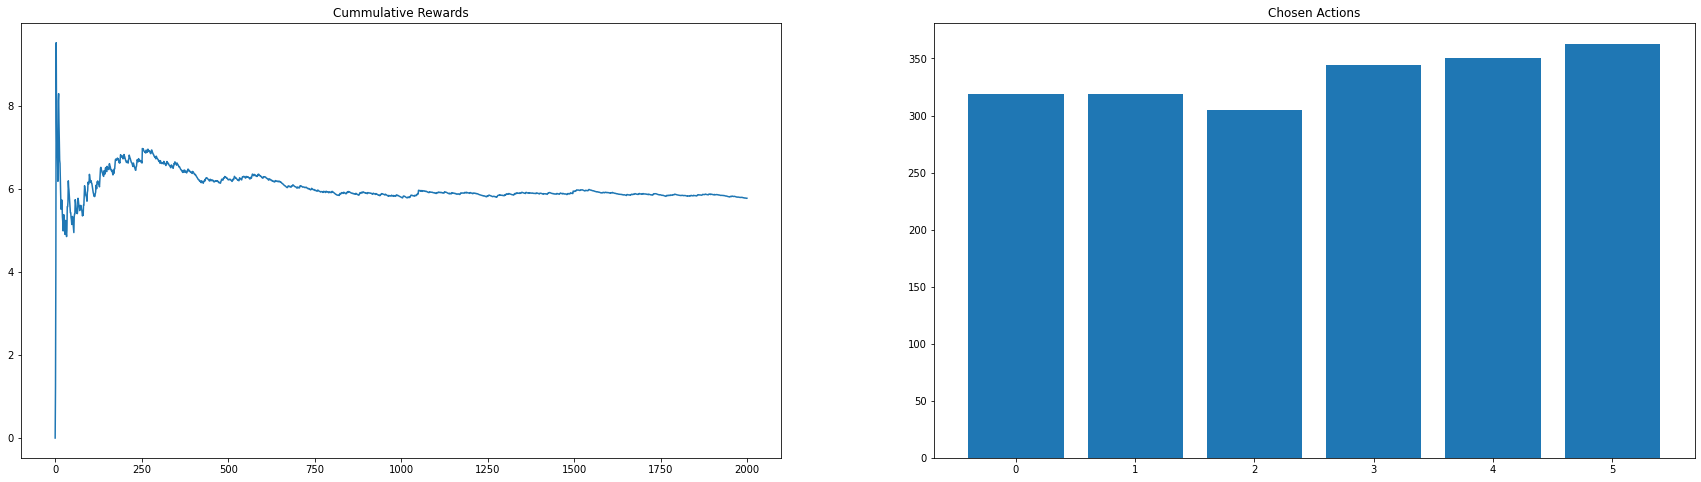

In [ ]:
plot_history(ra_history)

In [ ]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_iterations=200, epsilon=0.01, decay=0.001, decay_interval=50):
    self.env = env 
    self.iterations = max_iterations
    self.epsilon = epsilon 
    self.decay = decay 
    self.decay_interval = decay_interval

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    rewards = []
    cum_rewards = []

    for i in range(1, self.iterations + 1):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      reward = self.env.choose_arm(arm)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay 

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}


In [ ]:
egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=2000, epsilon=0.1, decay=1)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")

TOTAL REWARD : 35743.54999999999


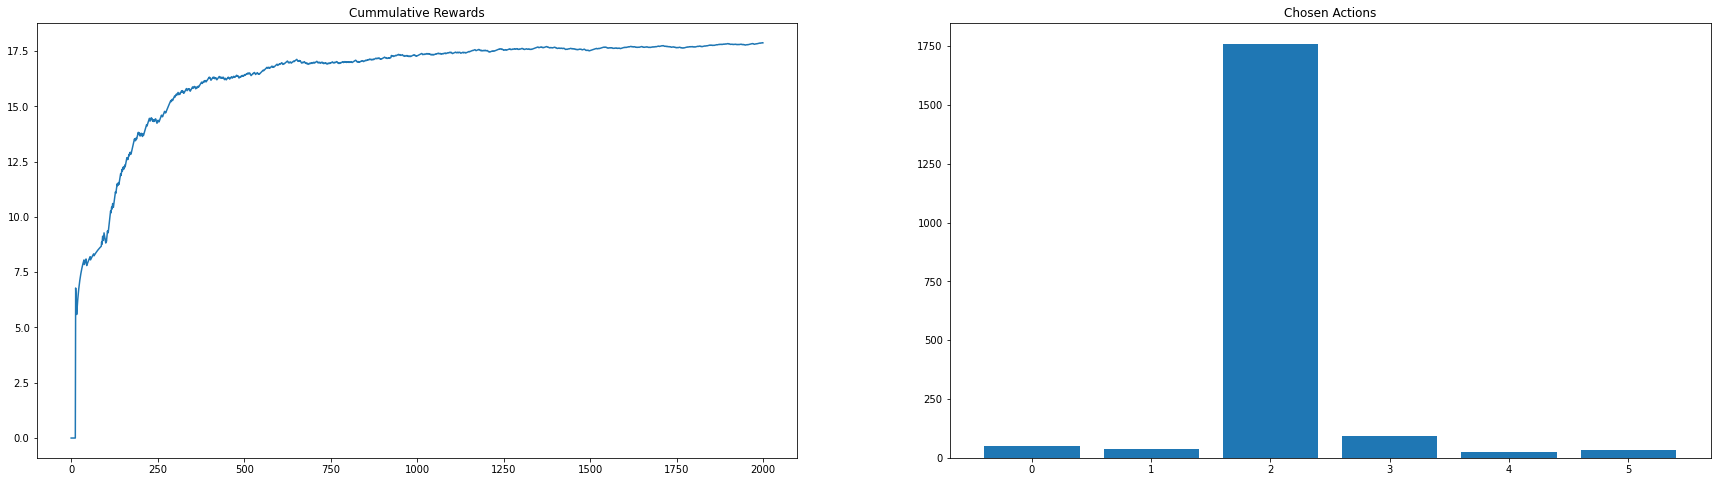

In [ ]:
plot_history(eg_history)

In [ ]:
egreedy_decay_agent = EpsilonGreedyAgent(environment, max_iterations=2000, epsilon=0.1, decay=0.01)
egd_history = egreedy_decay_agent.act()
print(f"TOTAL REWARD : {sum(egd_history['rewards'])}")

TOTAL REWARD : 38312.95


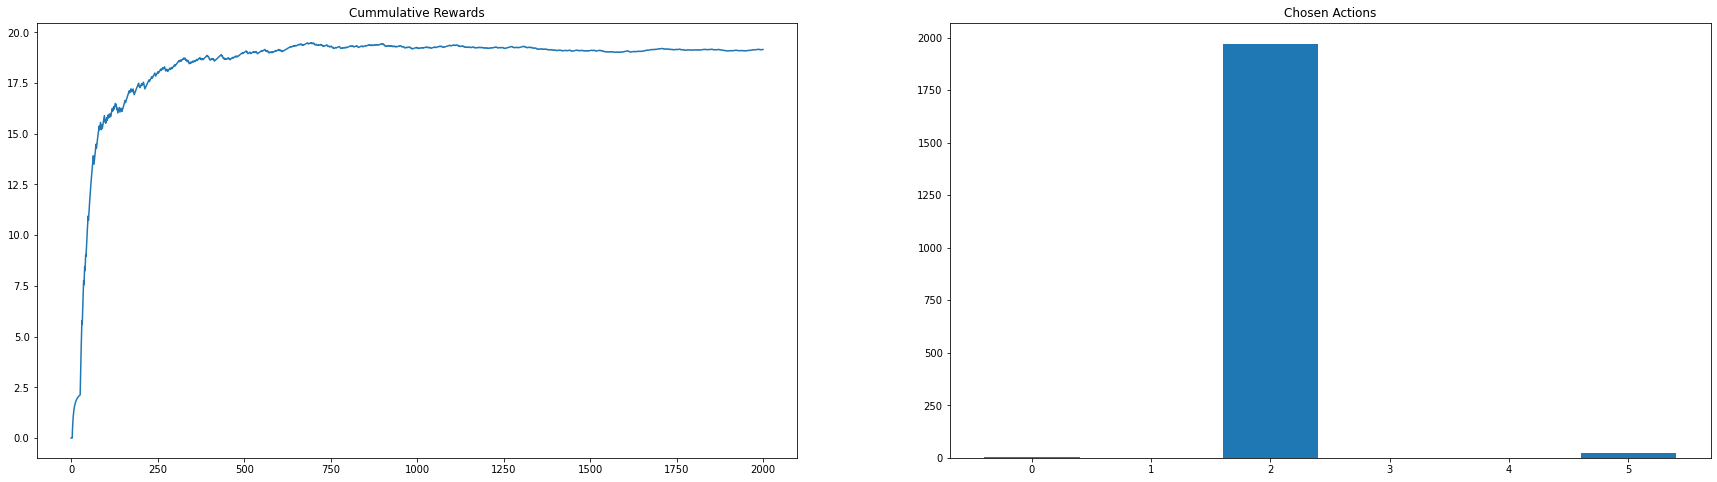

In [ ]:
plot_history(egd_history)